<a href="https://colab.research.google.com/github/Romauld1990/PDA_SOL/blob/main/SAM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [2]:
from google.colab import files

files.upload()

Saving bikes_rent.csv to bikes_rent.csv


{'bikes_rent.csv': b'season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt\n1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.80549038891,985\n1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.44394859186,801\n1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.43705990165,1349\n1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,4.80099776486,1562\n1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,5.59780956638,1600\n1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.0008684,2.68255181046,1606\n1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,5.05348323648,1510\n1,0,1,0,6,0,2,6.765,8.1127,53.5833,17.875868,7.99100044703,959\n1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.25065,10.8407018328,822\n1,0,1,0,1,1,1,6.184153,7.5444,48.2917,14.958889,6.68703129191,1321\n1,0,1,0,2,1,2,6.932731,9.5732,68.6364,8.182844,3.65795440322,1263\n1,0,1,0,3,1,1,7.081807,8.02365,59.9545,20.410009,9.12383057667,1162\n1,0,1,0,4,1,1,6.765,7.54415,47.0417,20.167,9.01519892713,1406\

In [3]:
df = pd.read_csv('bikes_rent.csv', na_values='?')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

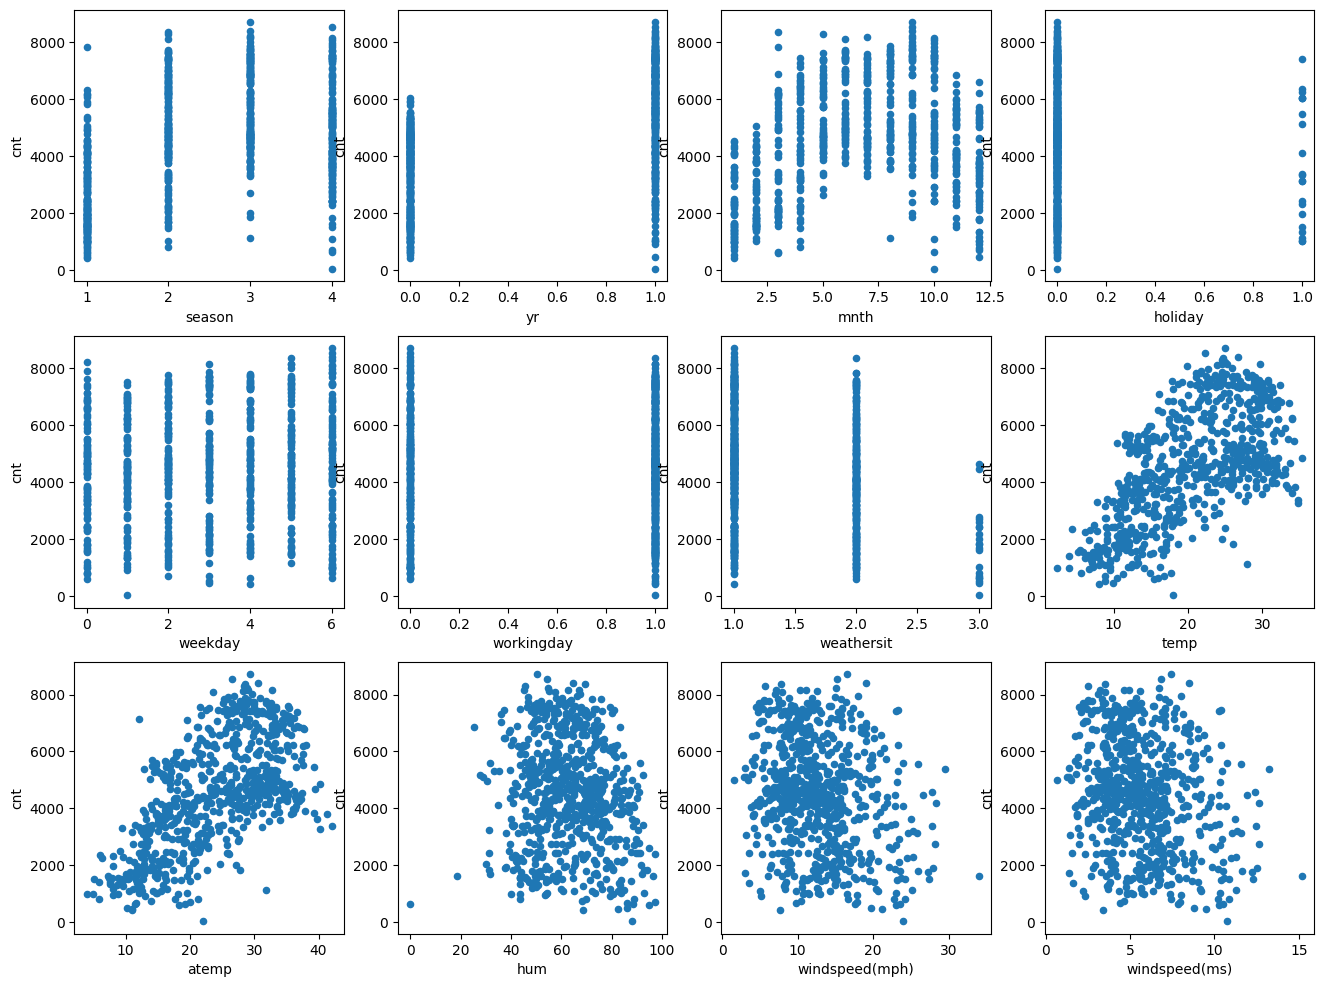

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: **с 3 по 10 месяцы прокатов больше, это связано с температурой**

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: **от темрепатуры прокат зависит линейно**

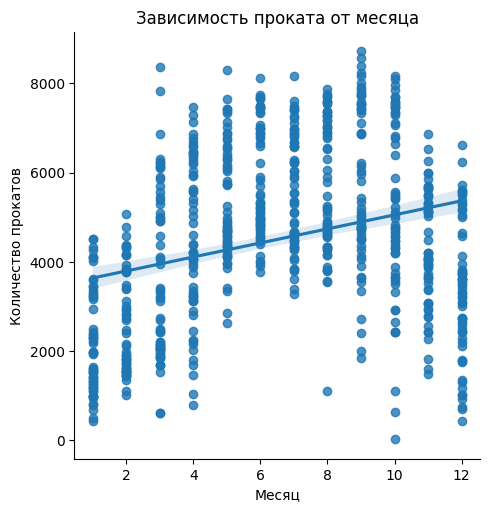

In [7]:
sns.lmplot(x='mnth', y='cnt', data=df)
plt.title('Зависимость проката от месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')

plt.show()

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: **Меньше всего коррелирует с windspeed(mph), : windspeed(ms), а больше всего корррелирует с season, yr, temp, atemp.**

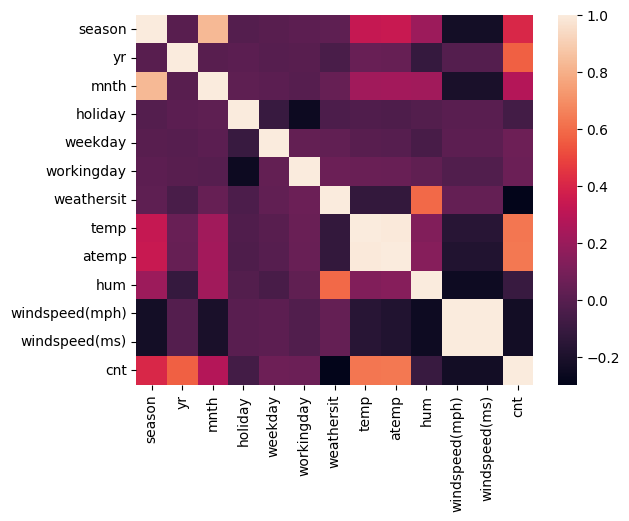

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: **и на данном графике такая есть корреляция, с каждым годом количество прокатов увеличивается, но сезонность остается такая же.**

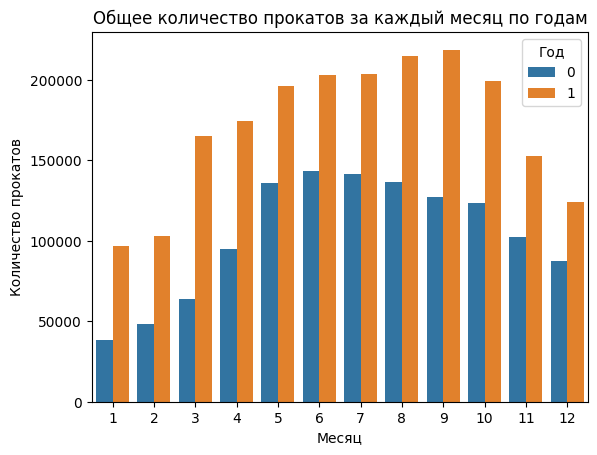

In [9]:
grouped_df = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Создаем barplot, используя данные из grouped_df, с разбивкой по годам
sns.barplot(x='mnth', y='cnt', hue='yr', data=grouped_df)

# Задаем название графика, осей и легенду
plt.title('Общее количество прокатов за каждый месяц по годам')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.legend(title='Год')

# Отображаем график на экране
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: **сначала сгруппировал данные по дню недели и посчитал среднюю поездку,потом построил данные по дням недели, поездок больше в пятницу и субботу, но распределение относительно равномерное при среднем подсчете.**
    
Ответ: **распределение по погодной ситуации уже значительно отличается, люди предпочитают ясную погоду**

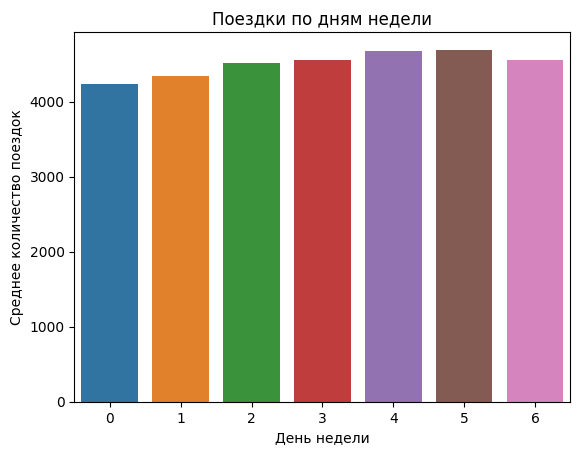

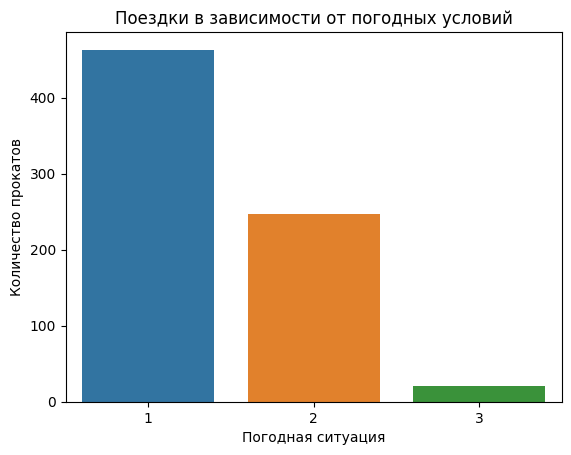

In [10]:
# Группируем данные по дню недели и считаем среднее количество поездок
weekday_avg = df.groupby('weekday')['cnt'].mean().reset_index()

# Строим barplot для среднего количества поездок по дням недели
sns.barplot(x='weekday', y='cnt', data=weekday_avg)

# Задаем название графика и оси X и Y
plt.title('Поездки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество поездок')

# Отображаем график на экране
plt.show()

# Строим countplot для признака weathersit
sns.countplot(x='weathersit', data=df)

# Задаем название графика и оси X
plt.title('Поездки в зависимости от погодных условий')
plt.xlabel('Погодная ситуация')
plt.ylabel('Количество прокатов')

# Отображаем график на экране
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: **в среднем чуть больше 4500 прокатов в день**

Ответ: **распределение называется Нормальным или Гауссовым распределением**

<ipython-input-11-f7f9902c7e5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'], color='green')


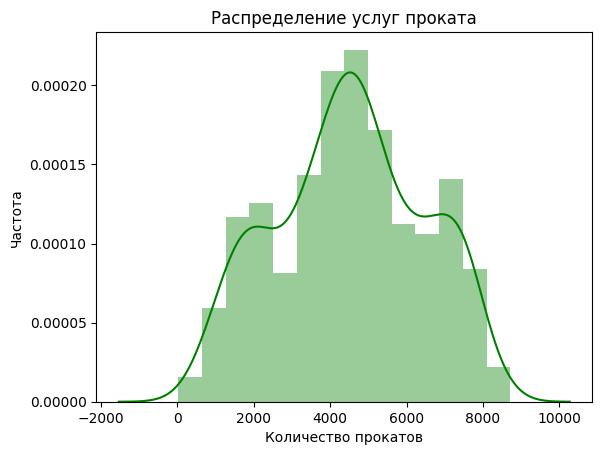

In [11]:
# Строим распределение целевого признака cnt и задаю цвет графику
sns.distplot(df['cnt'], color='green')

# Задаем название графика и метки для осей X и Y
plt.title('Распределение услуг проката')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')

# Отображаем график на экране
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ:   **  в данном случае зависимость ожидаема, температура и ощущаемая температуры связаны между собой, выбросы обусловлены или загрязненностью данных или необходимо включить в анализ дополнительные параметры, такие как windspeed ms  **


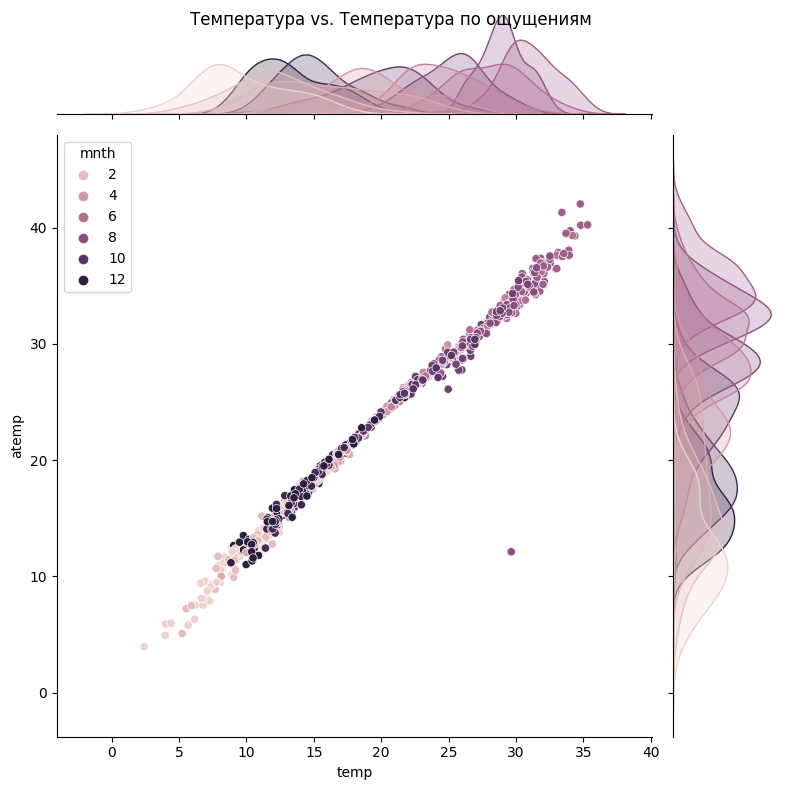

In [12]:
# Строим график совместного распределения признаков temp и atemp
sns.jointplot(x='temp', y='atemp', hue = 'mnth', data=df, kind='scatter', height = 8)

# Задаем название графика
plt.suptitle('Температура vs. Температура по ощущениям')

# Отображаем график на экране
plt.show()


## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: **связано с сезонностью, потеплением, а так же с наступлением летних каникул**

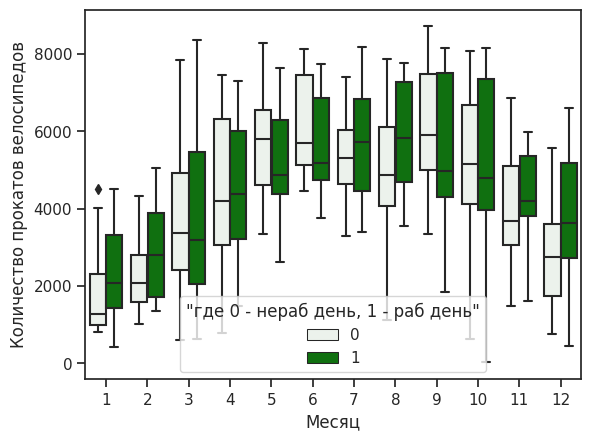

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем стиль графика
sns.set(style="ticks")

# Создаем график boxplot задаю цвет графику
sns.boxplot(x="mnth", y="cnt", hue="workingday", color='green', data=df)

# Добавляем названия осей
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов велосипедов')

# Отображаем легенду
plt.legend(title='"где 0 - нераб день, 1 - раб день"', loc='best')

# Отображаем график на экране
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: **Да, это правда. Высокая скорость ветра делает ощущаемую температуру ниже, чем реальная температура.**

**Мы можем исследовать это свойство с помощью графика, показывающего распределение ощущаемой температуры при разных скоростях ветра.**


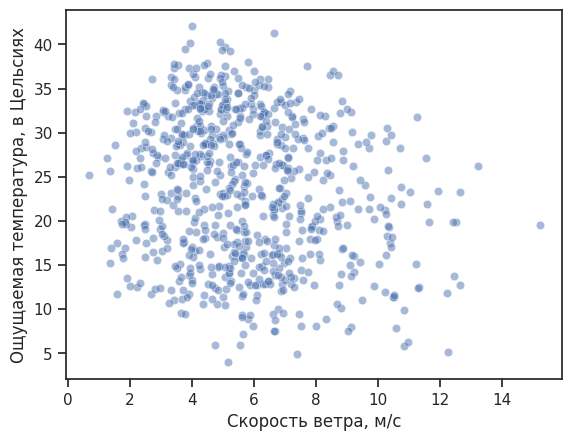

In [ ]:
sns.set(style="ticks")

# Создаем график scatterplot
sns.scatterplot(x="windspeed(ms)", y="atemp", data=df, alpha=0.5)

# Добавляем названия осей
plt.xlabel('Скорость ветра, м/c')
plt.ylabel('Ощущаемая температура, в Цельсиях')

# Отображаем график на экране
plt.show()